In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
%matplotlib inline
import numpy as np
import pandas as pd
import datetime
import csv

Загружаем данные

In [9]:
tr=pd.read_csv('trips.csv', sep='\t')

In [10]:
regions = pd.read_csv('regions.csv', sep=';')

суммируем колличество поездок из каждой зоны

In [11]:
r_tr_c=[]
for r in regions['region']:
    rc=tr[tr.tregion == r].sum()['tcount']
    r_tr_c.append([r,rc])

In [12]:
r_tr=pd.DataFrame(r_tr_c,columns=['tregion','tcount'])

считаем колличество ячеек, из которых не было ни одной поездки

In [13]:
r_tr[r_tr.tcount == 0].count()

tregion    1283
tcount     1283
dtype: int64

рисуем статическую карту с маркером на Эмпайр-Стейт-Билдинг (будем использовать модуль Basemap)

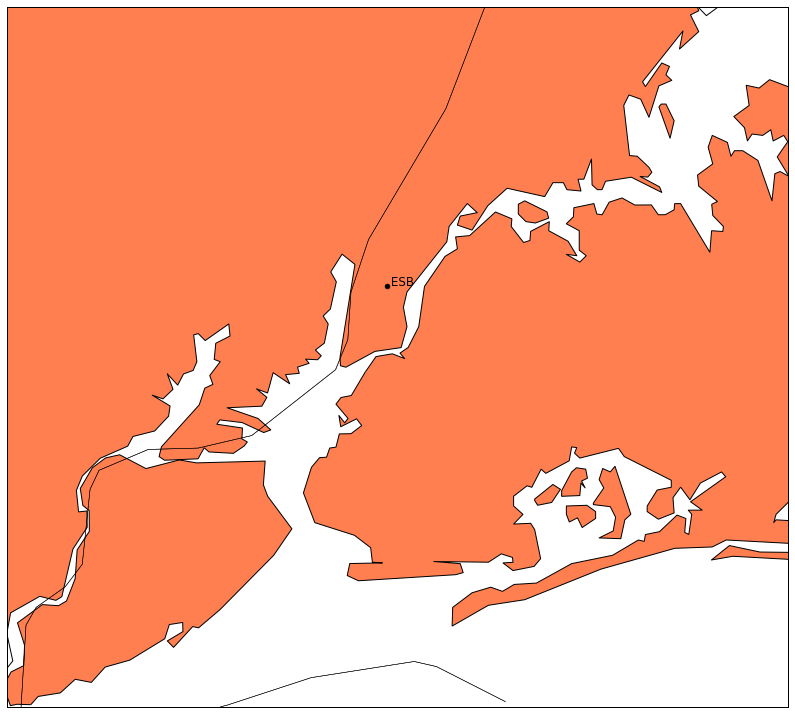

In [14]:
west, south, east, north = -74.25559, 40.49612, -73.70001, 40.91553

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111)
m = Basemap(projection='mill', llcrnrlat=south, urcrnrlat=north,llcrnrlon=west, urcrnrlon=east, lat_ts=south, lat_0=40.705825, lon_0=-73.9778,resolution='h',area_thresh=1)
m.drawcoastlines()
m.drawrivers(linewidth=0.5, linestyle='solid', color='aqua', antialiased=1, ax=None, zorder=None)
m.drawstates(linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='coral',lake_color='aqua')
x, y = m(-73.985664, 40.748441) #координаты Эмпайр-Стейт-Билдинг
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' ESB', fontsize=12)

преобразуем данные для построения тепловой карты и визуализируем их на статической карте

In [15]:
lat_edges = np.unique([regions.north, regions.south])
lng_edges = np.unique([regions.west, regions.east])

In [16]:
r_tr_coord=zip(r_tr['tregion'], r_tr['tcount'],regions['north'],regions['west'])

In [17]:
r_tr_c=pd.DataFrame(r_tr_coord,columns=['tregion','tcount', 'lat','long'])

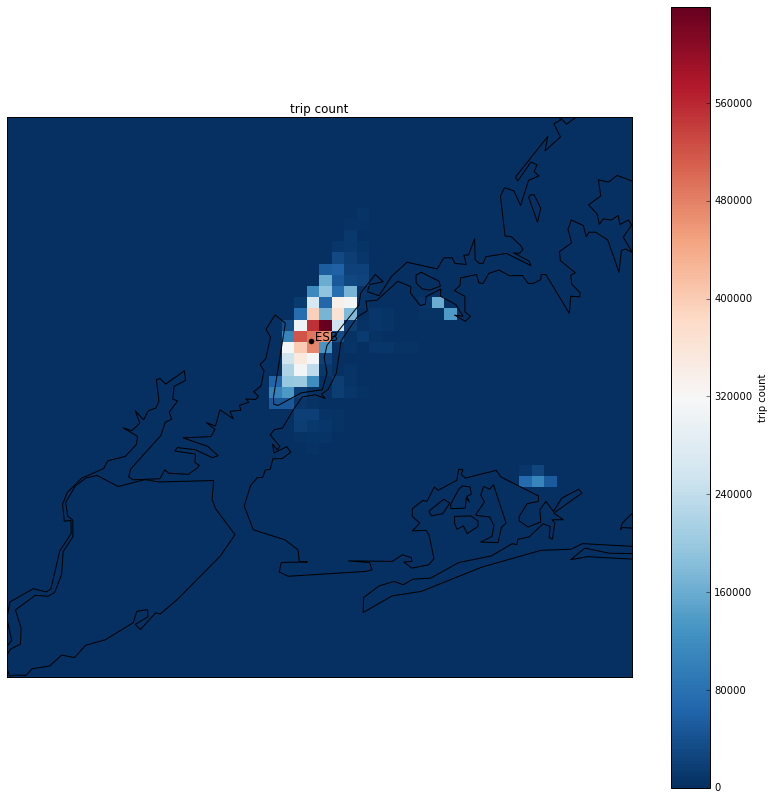

In [18]:
west, south, east, north = -74.25559, 40.49612, -73.70001, 40.91553

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111)
m = Basemap(projection='mill', llcrnrlat=south, urcrnrlat=north,llcrnrlon=west, urcrnrlon=east, lat_ts=south, lat_0=40.705825, lon_0=-73.9778,resolution='h',area_thresh=1)
m.drawcoastlines()
m.drawrivers(linewidth=0.5, linestyle='solid', color='aqua', antialiased=1, ax=None, zorder=None)
#m.drawstates(linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
#m.fillcontinents(color='coral',lake_color='aqua')
x, y = m(-73.985664, 40.748441)
lon, lat = np.meshgrid(lng_edges,lat_edges)
m.pcolormesh(lng_edges, lat_edges, r_tr_c.pivot(index='lat', columns='long', values='tcount'),latlon=True, cmap='RdBu_r')
#plt.clim(0, 600)
plt.title('trip count')
plt.colorbar(label='trip count')
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' ESB', fontsize=12)

для интерактивной карты будем использовать gmaps
координаты статуи свободы SOL 40.689247, -74.044502

In [19]:
import folium
map = folium.Map(location=[40.689247, -74.044502], zoom_start=12)
folium.Marker([40.689247, -74.044502], popup='SOL').add_to(map)
map

подготовим данные для тепловой карты и нарисуем ее

In [20]:
r_tr_m=[]
for r in regions['region']:
    rc=tr[tr.tregion == r].mean()['tcount']
    r_tr_m.append([r,rc])
    
r_tr=pd.DataFrame(r_tr_m,columns=['tregion','tcount'])
r_tr_coord=zip(r_tr['tregion'], r_tr['tcount'],regions['north'],regions['west'])
r_tr_c=pd.DataFrame(r_tr_coord,columns=['tregion','tcount', 'lat','long'])
r_tr_m_c=[]
for r in range(0,2499):
    r_tr_c[r_tr_c.tcount >250].count()
    r_tr_m_c.append([r_tr_c['lat'][r],r_tr_c['long'][r],r_tr_c['tcount'][r]])

In [24]:
import folium.plugins
map = folium.Map(location=[40.689247, -74.044502], zoom_start=12)
folium.plugins.HeatMap(r_tr_m_c, min_opacity=0.05, radius=8, blur=5, gradient={1: 'red'}).add_to(map)
map

посчитаем колличество зон со средним месячным колличеством поездок не менее 5 и сохраним по ним данные

In [22]:
r_tr_c5=r_tr_c[r_tr_c.tcount >=5]
r_tr_c5.count()

tregion    102
tcount     102
lat        102
long       102
dtype: int64

In [23]:
folium.plugins.HeatMap?